# **Project Name:** **Bankruptcy Prevention**

#**Business Objective:**

This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.

The data file contains 7 features about 250 companies

The data set includes the following variables:

1.	industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.

2.	management_risk: 0=low risk, 0.5=medium risk, 1=high risk.

3.	financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high
     flexibility.

4.	credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.

5.	competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high
     competitiveness.

6.	operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.

7.	class: bankruptcy, non-bankruptcy (target variable).

Acceptance Criterion:
Need to deploy the end results using Flask /Streamlit.etc.


In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing Dataset
from google.colab import files
uploaded=files.upload()

# **Reading the Data**

In [2]:
bankruptcy=pd.read_csv('bankruptcy-prevention -.csv', delimiter=';')
bankruptcy

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


# **Basic &EDA**

In [111]:
bankruptcy.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [112]:
bankruptcy.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
bankruptcy.shape

(250, 7)

In [114]:
bankruptcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


* **All the features of this datatype are correct.**

In [115]:
bankruptcy.isna().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

* **There is no null values in the given dataset.**

In [116]:
bankruptcy.value_counts()

industrial_risk   management_risk   financial_flexibility   credibility   competitiveness   operating_risk   class        
0.0              1.0               0.0                     0.0           0.0               1.0              bankruptcy        11
1.0              1.0               0.0                     0.0           0.0               1.0              bankruptcy        10
                                                                                           0.5              bankruptcy         9
0.5              1.0               0.0                     0.0           0.0               1.0              bankruptcy         8
                 0.5               0.0                     0.0           0.0               1.0              bankruptcy         7
                                                                                                                              ..
0.0              1.0               0.5                     0.0           0.5               0.0         

In [117]:
bankruptcy.nunique()

industrial_risk           3
 management_risk          3
 financial_flexibility    3
 credibility              3
 competitiveness          3
 operating_risk           3
 class                    2
dtype: int64

In [118]:
bankruptcy.duplicated().value_counts()

True     147
False    103
dtype: int64

* **There are 147 duplicated records in the given dataset.**

In [119]:
bankruptcy[bankruptcy.duplicated()]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


# **Histplot**

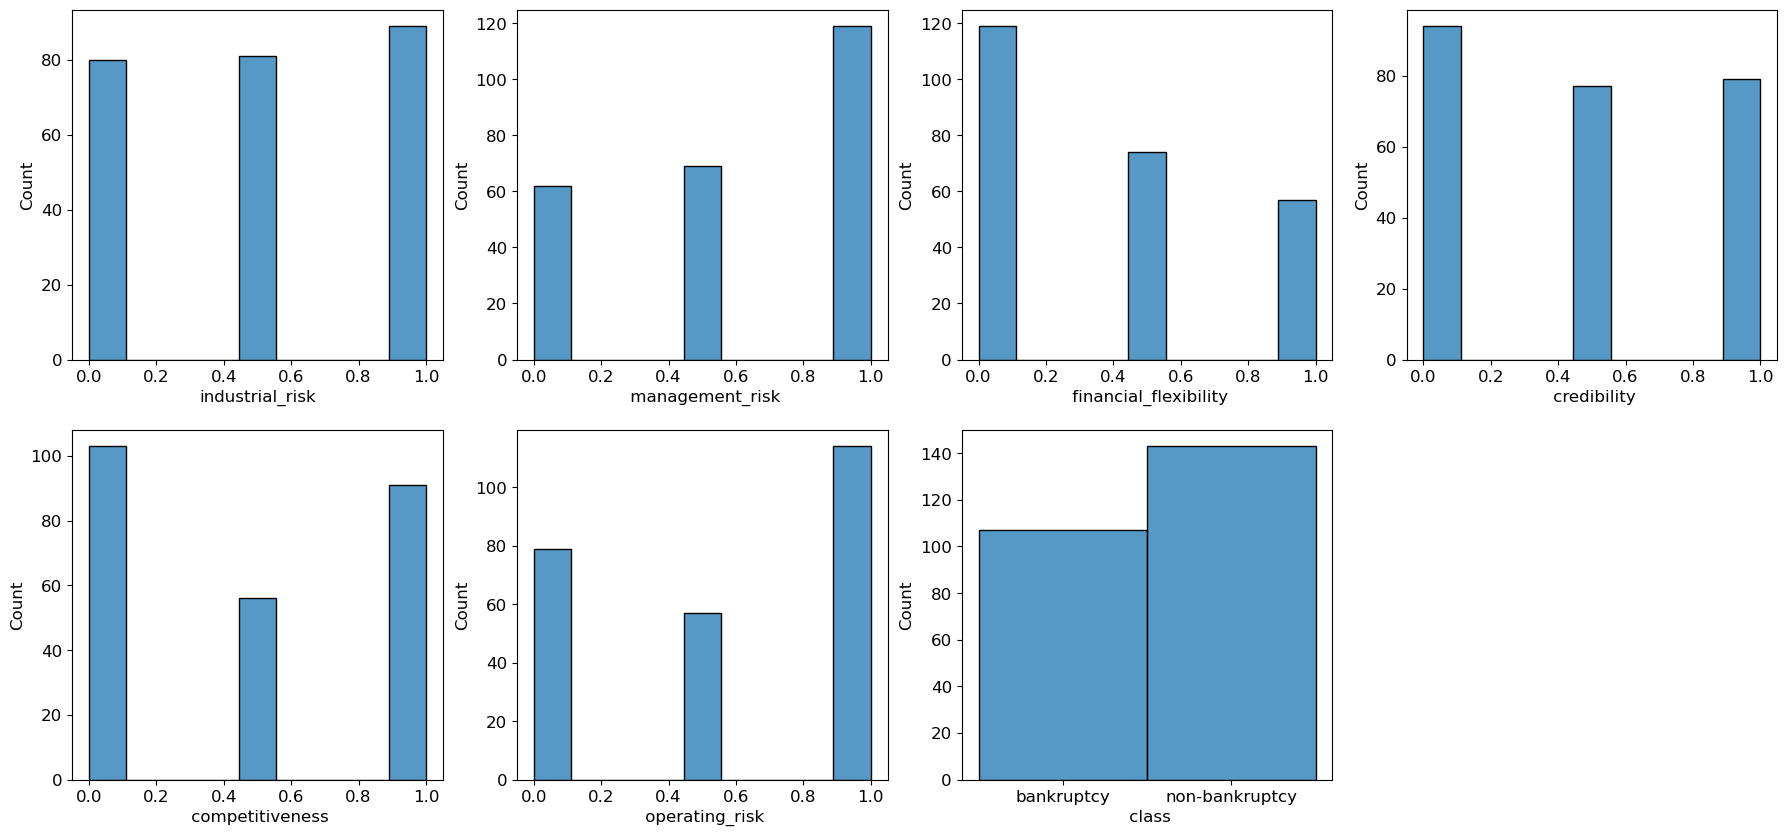

In [120]:
#Plotting Histplots to observe datapoints
plt.figure(figsize=(22,10))
for i, column in enumerate(bankruptcy.columns, 1):
    plt.subplot(2,4,i)
    sns.histplot(bankruptcy[column])

* **Observation:** To check the distribution of the data we used histplot.
From this plot we can see that non-bankruptcy is high compared to bankruptcy.

# **Boxplot**

The boxplot is useful for understanding the central tendency and spread of the data,as well as any outliers

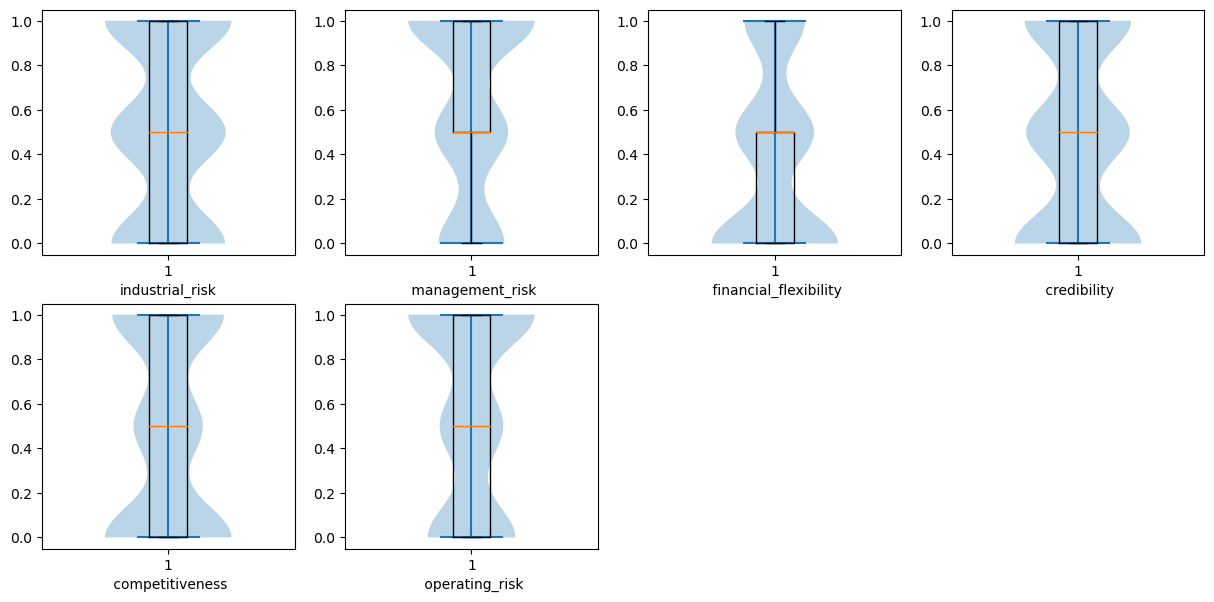

In [4]:
#Plotting Boxplots to observe datapoints nature
plt.figure(figsize=(15,7))
for i, column in enumerate(bankruptcy[[feature for feature in bankruptcy.columns if bankruptcy[feature].dtypes != 'O']].columns, 1):
    plt.subplot(2,4,i)
    plt.violinplot(bankruptcy[column])
    plt.boxplot(bankruptcy[column])
    plt.xlabel(bankruptcy[column].name)

* **Observation:** To detect the outliers in every feature we used boxplot. From the above plots we are seen that there are no outliers in this data.

# **Heatmap**

A heatmap is a technique of data visualization that makes use of colour in order to exhibit how the value of interest varies on the basis of the values of the two other variables.

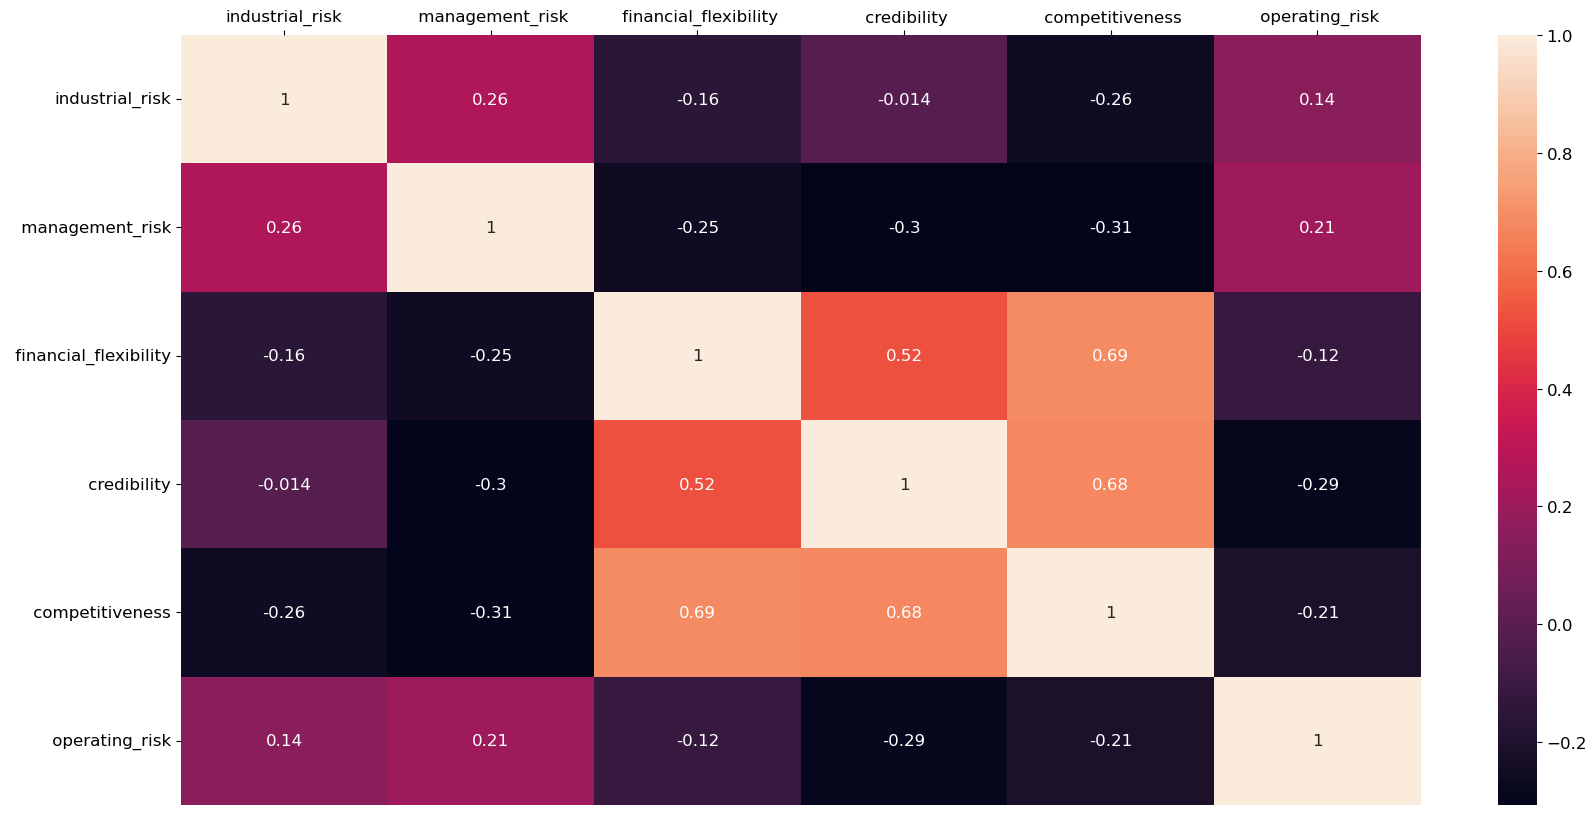

In [122]:
#Plotting the Heatmap for Correlation
plt.figure(figsize=(20,10))
ax = sns.heatmap(bankruptcy.corr(), annot=True)
ax.xaxis.tick_top()

* **Observation:** To check the corelation b/w each & every feature we used heat map. from the above heatmap corelation b/w financial flexiblity & competitiveness is high(0.69) & corelation b/w mamagement risk & compotitiveness is low(-0.31).

# **Pairplot**
To Understand the best set of features to explain a relationship between Two Variables we used the pairplots.

<Figure size 1200x500 with 0 Axes>

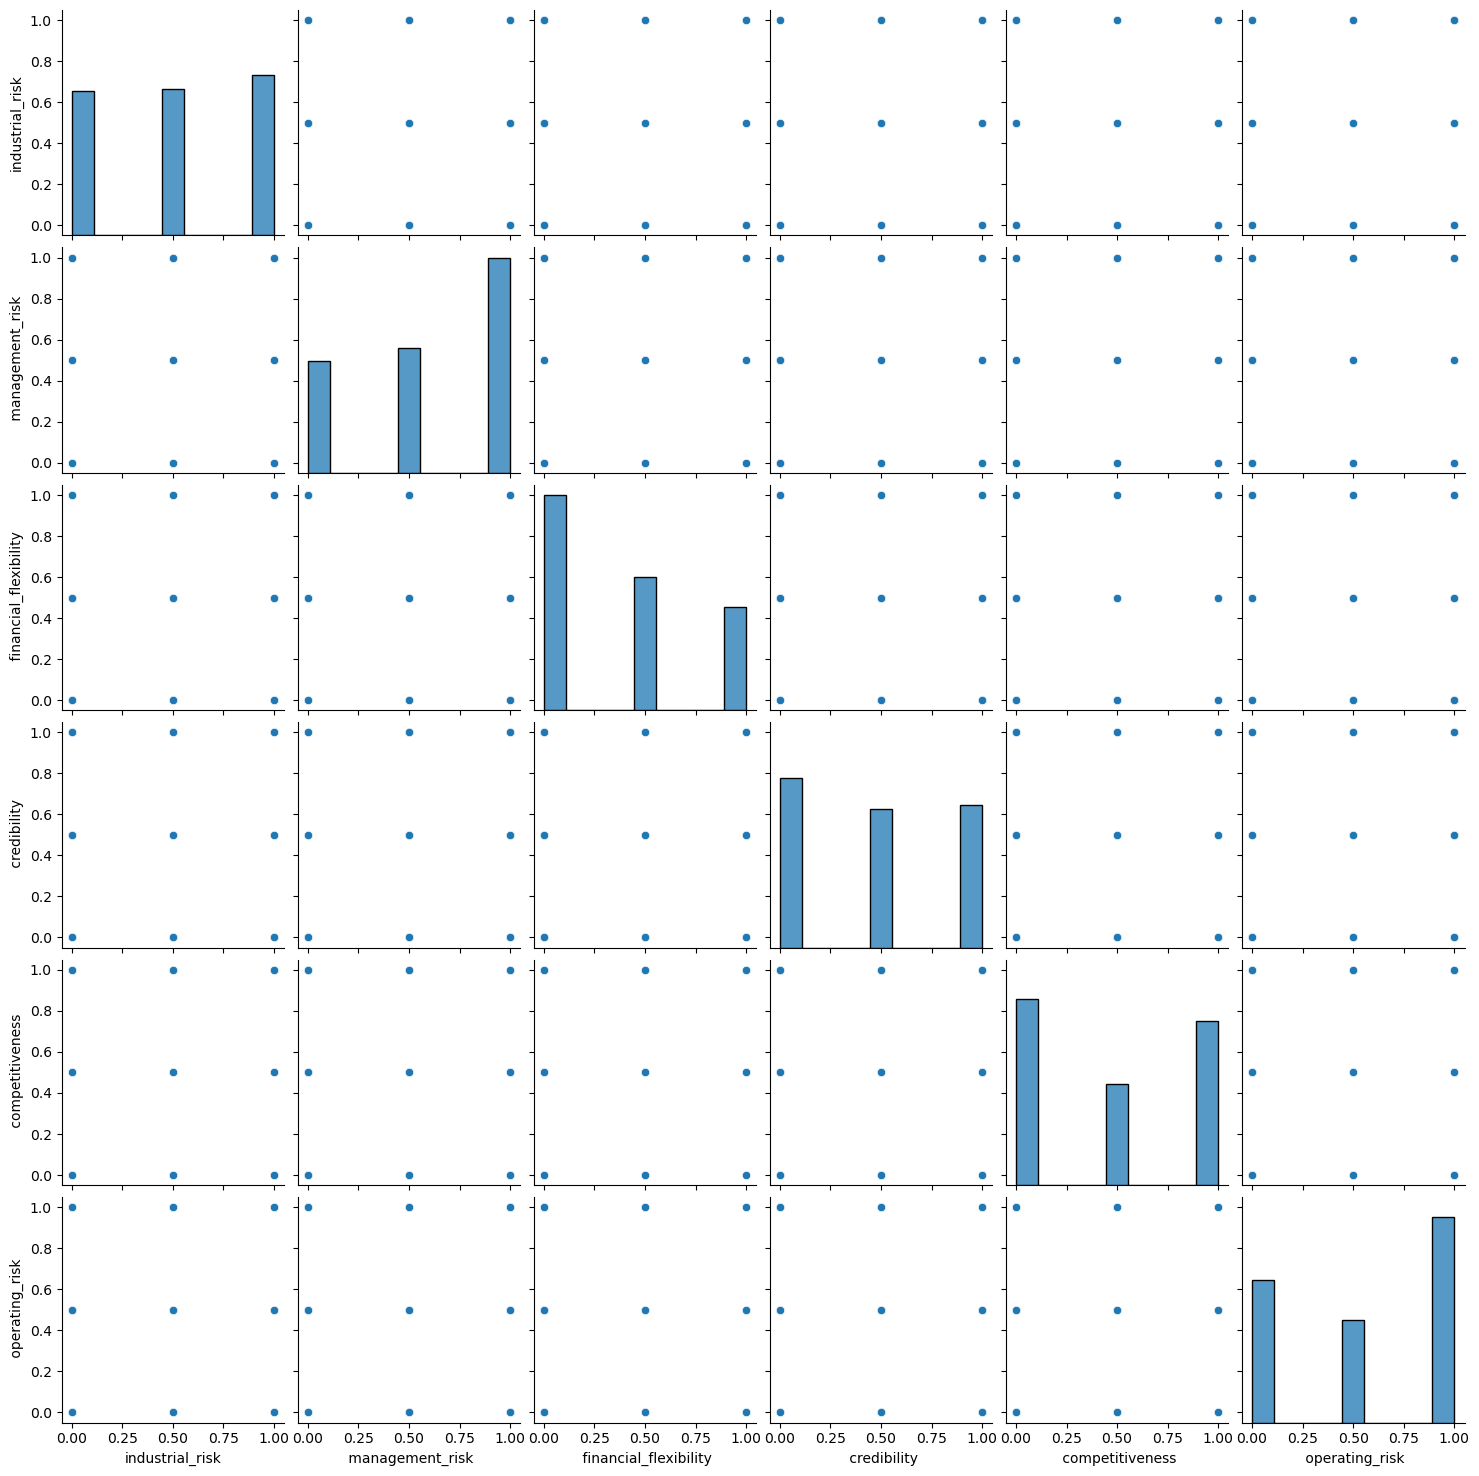

In [15]:
#Plotting Pairplot
plt.figure(figsize=(12,5))
sns.pairplot(data=bankruptcy)
plt.show()

* **Observation:**
To plot the multiple pairwise bivariate distributions in the dataset we used the pairplot.

The diagonal plots are the univariate plots in that plots we can see how the distributions was done in this plots.   

# Types of Variables:

# 1. Categorical Variables

In [123]:
categorical = [var for var in bankruptcy.columns if bankruptcy[var].dtype=='O']
print('There is {} categorical variable\n'.format(len(categorical)))
print('The categorical varaible is :', categorical)

There is 1 categorical variable

The categorical varaible is : [' class']


In [124]:
bankruptcy[categorical].head()

,class
0,bankruptcy
1,bankruptcy
2,bankruptcy
3,bankruptcy
4,bankruptcy


# 2. Numerical Variables

In [3]:
numerical = [var for var in bankruptcy.columns if bankruptcy[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n', numerical)

# 'O' typically represents dtype 'object' or 'categorical' variables in pandas DataFrames.

There are 6 numerical variables

The numerical variables are :
 ['industrial_risk', ' management_risk', ' financial_flexibility', ' credibility', ' competitiveness', ' operating_risk']


In [4]:
bankruptcy[numerical].head(5)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0


# Converting Categorical Variable 'class' to Numerical Value

In [5]:
bankruptcy[' class'].unique()

array(['bankruptcy', 'non-bankruptcy'], dtype=object)

In [6]:
mapping = {'bankruptcy': 0, 'non-bankruptcy': 1}

# applying mapping to the 'class' column
bankruptcy[' class'] = bankruptcy[' class'].map(mapping)
bankruptcy.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [129]:
# checking correlation between the 6 attributes and the target variable 'class'
Correlation = bankruptcy.corr()
Correlation[' class'].sort_values(ascending = False)

 class                    1.000000
 competitiveness          0.899452
 credibility              0.755909
 financial_flexibility    0.751020
industrial_risk          -0.227823
 operating_risk          -0.279786
 management_risk         -0.370838
Name:  class, dtype: float64

Interpretation:
1. We can see that there is a strong positive correlation between 'class' and 'competitiveness'
2. We can see that all the variables are positively and negatively correlated with Class variable. 
3. Some variables are strongly positive correlated while some variables are negatively correlated.

# Declaring feature vector and target variable "class"

In [7]:
X = bankruptcy.drop([' class'], axis = 1)
y = bankruptcy[[' class']]

In [8]:
# feature vector dataset
X.head(3)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# target variable 'class'
y.head(4)

,class
0,0
1,0
2,0
3,0


# Splitting data into Training and Testing Set

In [9]:
# importing library for data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
# viewing training dataset
X_train.head(3)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
132,0.0,1.0,0.5,0.5,0.5,0.0
225,0.0,0.0,1.0,1.0,0.5,0.0
238,0.5,0.5,1.0,1.0,0.5,0.5


In [14]:
# viewing testing dataset
X_test.head(3)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
142,0.0,1.0,1.0,1.0,0.5,1.0
6,1.0,1.0,0.0,0.0,0.0,0.0
97,1.0,1.0,0.0,0.5,0.0,0.5


In [136]:
# checking dimensions of X_train and X_test
X_train.shape, X_test.shape

((200, 6), (50, 6))

In [137]:
# checking X_train data types
X_train.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
dtype: object

# Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# X_train dataset ready to be fed into the model.
X_train

array([[-1.29848929,  0.9900495 ,  0.33002115,  0.03562604,  0.03953414,
        -1.28846329],
       [-1.29848929, -1.41007051,  1.575384  ,  1.2231606 ,  0.03953414,
        -1.28846329],
       [-0.07349939, -0.2100105 ,  1.575384  ,  1.2231606 ,  0.03953414,
        -0.13804964],
       ...,
       [-0.07349939,  0.9900495 , -0.91534169, -1.15190852, -1.09001283,
        -0.13804964],
       [-1.29848929, -0.2100105 ,  1.575384  ,  0.03562604,  1.16908112,
        -1.28846329],
       [ 1.1514905 ,  0.9900495 ,  0.33002115, -1.15190852, -1.09001283,
         1.01236401]])

In [13]:
# labelling training dataset into a DataFrame
X_train_scaled = pd.DataFrame(X_train)
X_train_scaled.head()

,0,1,2,3,4,5
0,-1.298489,0.990050,0.330021,0.035626,0.039534,-1.288463
1,-1.298489,-1.410071,1.575384,1.223161,0.039534,-1.288463
2,-0.073499,-0.210011,1.575384,1.223161,0.039534,-0.138050
3,1.151491,0.990050,0.330021,1.223161,1.169081,1.012364
4,1.151491,-1.410071,1.575384,1.223161,1.169081,1.012364


# Logistic Regression Model Fitting

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

# Predicting Test-Set Result

In [15]:
# Making predictions on the testing set
y_pred_LR = model.predict(X_test)
y_pred_LR

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0], dtype=int64)

# Checking Accuracy

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_LR)
print('Model Accuracy Score is', accuracy)

Model Accuracy Score is 1.0


# K Nearest Neighbor Classifier Model Building

In [144]:
# importing KNeighbors Classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# instantiating the model
model = KNeighborsClassifier(n_neighbors = 3)

# fitting the model to the training set
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Predicting Test-Set Result

In [145]:
y_pred_KNN = model.predict(X_test)
y_pred_KNN

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0], dtype=int64)

Here, 0 signifies 'bankruptcy' and '1' signifies Non-bankruptcy

# Checking Accuracy Score

In [146]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy Score is', accuracy)

Model Accuracy Score is 1.0


# Comparing the Training set and Testing Set Accuracy

In [147]:
y_pred_train = model.predict(X_train)
print('Training Set Accuracy Score is', accuracy_score(y_train, y_pred_train))

Training Set Accuracy Score is 0.995


# Checking for Overfitting and Underfitting

In [148]:
training_accuracy = model.score(X_train, y_train)
print('Training Set Score', training_accuracy)

Training Set Score 0.995


In [149]:
testing_accuracy = model.score(X_test, y_test)
print('Testing Set Accuracy', testing_accuracy)

Testing Set Accuracy 1.0


Training and testing accuracy score is comparable, therefore, there is no chance of Overfitting.

In [150]:
y_test.value_counts()

 class
1         29
0         21
dtype: int64

# Comparing Model Accuracy with Null Accuracy

In [151]:
# check null accuracy score
null_accuracy = (29/(29+21))
print('Null Accuracy Score is', null_accuracy)

# The null accuracy is calculated as the accuracy that could be achieved by always predicting the most frequent class in the 
# dataset. It represents the accuracy you would get if you ignored the features and simply predicted the majority class for
# every observation.

Null Accuracy Score is 0.58


Our model accuracy score is 0.98 but null accuracy score is 0.58, therfore, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels

# Rebuilding kNN Classification model using k =  5

In [152]:
# instantiating the model
model = KNeighborsClassifier(n_neighbors = 5)

# fitting the model to the training set
model.fit(X_train, y_train)

KNeighborsClassifier()

In [153]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy Score with k = 5, is', accuracy)

Model Accuracy Score with k = 5, is 0.98


# Rebuilding kNN Classification model using k = 7

In [154]:
# instantiating the model
model = KNeighborsClassifier(n_neighbors = 7)

# fitting the model to the training set
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [155]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy Score with k = 7, is', accuracy)

Model Accuracy Score with k = 7, is 0.98


In [ ]:
Interpretation
Our original model accuracy score with k=3 is 0.9714. Now, we can see that we get same accuracy score of 0.9714 with k=5. But, if we increase the value of k further, this would result in enhanced accuracy.

With k=6,7,8 we get accuracy score of 0.9786. So, it results in performance improvement.

If we increase k to 9, then accuracy decreases again to 0.9714.

In [ ]:
Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue

# Confusion Matrix for Logistic Regression

In [156]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_pred_LR)

print('Confusion Matrix:\n\n', conf)
print('\nTrue Positives(TP) = ', conf[0,0])
print('\nTrue Negatives(TN) = ', conf[1,1])
print('\nFalse Positives(FP) = ', conf[0,1])
print('\nFalse Negatives(FN) = ', conf[1,0])

Confusion Matrix:

 [[21  0]
 [ 0 29]]

True Positives(TP) =  21

True Negatives(TN) =  29

False Positives(FP) =  0

False Negatives(FN) =  0


The confusion matrix shows 21 + 29 = 50 correct predictions and 0 incorrect predictions.

In this case, we have

1. True Positives (Actual Positive:1 and Predict Positive:1) - 21
2. True Negatives (Actual Negative:0 and Predict Negative:0) - 29
3. False Positives (Actual Negative:0 but Predict Positive:1) - 0 (Type I error)
4. False Negatives (Actual Positive:1 but Predict Negative:0) - 0 (Type II error)

# Confusion Matrix for KNN Classifier

In [157]:
conf = confusion_matrix(y_test, y_pred_KNN)

print('Confusion Matrix:\n\n', conf)
print('\nTrue Positives(TP) = ', conf[0,0])
print('\nTrue Negatives(TN) = ', conf[1,1])
print('\nFalse Positives(FP) = ', conf[0,1])
print('\nFalse Negatives(FN) = ', conf[1,0])

Confusion Matrix:

 [[21  0]
 [ 0 29]]

True Positives(TP) =  21

True Negatives(TN) =  29

False Positives(FP) =  0

False Negatives(FN) =  0


The confusion matrix shows 21 + 28 = 49 correct predictions and 0 + 1 = 1 incorrect predictions.

In this case, we have

1. True Positives (Actual Positive:1 and Predict Positive:1) - 21 
2. True Negatives (Actual Negative:0 and Predict Negative:0) - 29 
3. False Positives (Actual Negative:0 but Predict Positive:1) - 0 (Type I error) 
4. False Negatives (Actual Positive:1 but Predict Negative:0) - 0 (Type II error)

# Classification Metrices for Logistic Regression

In [158]:
from sklearn.metrics import classification_report
classif = classification_report(y_test, y_pred_LR)
print('Classification Report:\n\n', classif)

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



avg accuracy : 1.00

# Classification Metrices for KNN Classifier

In [159]:
from sklearn.metrics import classification_report
classif = classification_report(y_test, y_pred_KNN)
print('Classification Report:\n\n', classif)

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



avg accuracy : 0.98

In [160]:
# checking classification accuracy

TP = conf[0,0]
TN = conf[1,1]
FP = conf[0,1]
FN = conf[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification Accuracy', classification_accuracy)

Classification Accuracy 1.0


In [161]:
# classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification Error', classification_error)

Classification Error 0.0


# Cross Validation for Logistic Regression

In [162]:
from sklearn.model_selection import cross_val_score

# choose k between 1 to 41
k_range = range(1, 41)    # k_range = [1, 3, 5, 7, 9]  # or any other list of k values you want to explore
k_scores = []    # to store the cross-validation scores for each k
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    model = LogisticRegression()
    scores = cross_val_score(knn, X, y, cv=5)    # 5-fold cross-validation
    k_scores.append(scores.mean())


In [163]:
# Use cross_val_score for cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # Adjust cv (number of folds) as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [1.    1.    1.    0.975 1.   ]
Mean Accuracy: 0.9949999999999999


Interpretation:
Using the mean cross-validation, we can conclude that the average accuracy for Logistic Regression to be 99.4 %.

# Cross Validation for KNN Classifier

In [164]:
from sklearn.model_selection import cross_val_score

# choose k between 1 to 41
k_range = range(1, 41)    # k_range = [1, 3, 5, 7, 9]  # or any other list of k values you want to explore
k_scores = []    # to store the cross-validation scores for each k
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    model = KNeighborsClassifier(n_neighbors = 3)
    scores = cross_val_score(model, X, y, cv=5)    # 5-fold cross-validation
    k_scores.append(scores.mean())

# Use cross_val_score for cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # Adjust cv (number of folds) as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [1.    1.    0.975 0.975 1.   ]
Mean Accuracy: 0.99


Interpretation: 
Using the mean cross-validation, we can conclude that the average accuracy for KNN Classifier to be 99 %.

# ROC Curve for Logistic Regression

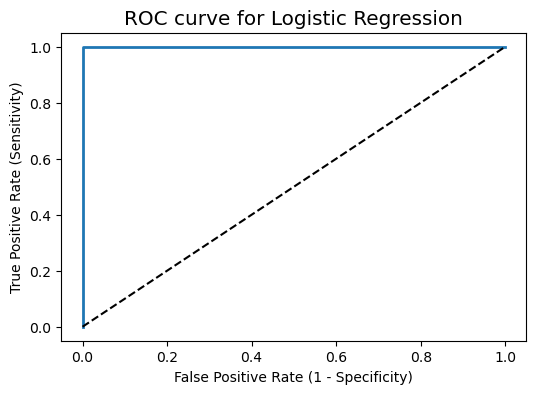

In [18]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_LR)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Logistic Regression')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [166]:
# computing ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_LR)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 1.0000


Interpretation:
ROC AUC is equal to 1. So, we can conclude that, the KNN classifier is indeed a very good model.

# CONCLUSIONS:
    
1. In this Classification project, our motive was to predict a binary class (bankruptcy or non-bankruptcy).
   The goal here is to model the probability that a business goes bankrupt from different features.

2. We built a Logistic Regression and kNN classifier model to classify the binary class. Both the models yield very good 
   performance as indicated by the model accuracy. 
    
3. The model accuracy as indicated for Logistic Regression was found to be 1.00.

4. The model accuracy for KNN Classifier, for k = 3 predicted 1.00, for k = 5, 7 predicted an accuracy score of 0.98.

5. Therefore, we can state that the model accuracy is 1.00 for both Logistic Regression and KNN Classifier (with k = 3) 

6. Training and testing accuracy score is comparable, with Training set = 0.95 and Testing set = 1.00 accuracy score.
   Therefore, there is no chance of Overfitting.
    
7. The Confusion Matrix for Logistic Regression showed 50 correct predictions and 0 incorrect predictions.
   True Positives = 21, True Negatives = 29 and both False Positive and False Negative predicted 0.

8. The Confusion Matrix for KNN Classifier showed 49 correct predictions and 1 incorrect predictions.
   True Positives = 21, True Negatives = 28, False Positive = 0 and False Negative = 1.
    
9. The Classification Report for Logistic Regression for precision, recall and f1-score predicted mean score of 1.00

10. The Classification Report for KNN CLassifier for precision, recall and f1-score predicted mean score of 0.98

11. Using the mean cross-validation, both the models predicted to be around 0.99 accurate on average.

12. ROC AUC for Logistic Regression predicted score of 1.00. 
    ROC AUC for KNN Classifier predicted score of 0.98. So, we can conclude that both the models are doing a good job.

13. Therefore, we can conclude that both the models have predicted a very good accuracy and this is a promising result,
    suggesting that both the models have performed well on the provided data.

In [ ]:
 annaconda prompt > pip install virtualenv > python -m venv Bankrupt >  cd Bankrupt > cd scripts > activate > cd.. > pip install streamlit > pip install sklearn  >  streamlit Hello > mukeshlaish@gmail.com